In [28]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2200422\AppData\local\Temp\ipykernel_16428\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [29]:
%matplotlib notebook ##import des packages
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [71]:
data = pd.read_csv("h:/BUT3/sae 601/ds_salaries.csv",sep =",") #On importe les données 
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [70]:
Projet gitHub : https://github.com/Maximee-eeeeee/SAE601.git
# Répertoire cible dans votre projet
#project_dir = r"....."

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
#cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

NameError: name 'path' is not defined

In [32]:
# Lire le fichier depuis le répertoire du projet


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [33]:
#données manquantes 
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

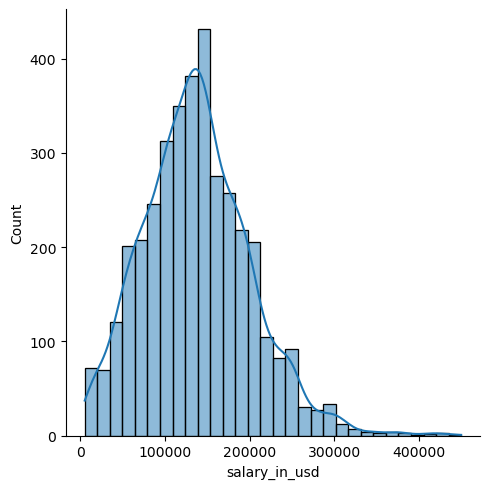

In [34]:
# Distribution des salaires en USD
sns.displot(data["salary_in_usd"],kde =True ,bins = 30)
plt.show()

In [35]:
# liste des pays concerné par l'étude 

data["employee_residence"].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [36]:
#Salaire moyen par rôle
print(data.groupby(['employment_type'])[['salary']].mean())

# Salaire moyen par pays
print(data.groupby(['employee_residence'])[['salary']].mean())

# Salaires moyens par niveau d'expérience
print(data.groupby(['experience_level'])[['salary']].mean())

                        salary
employment_type               
CT               113300.000000
FL               288755.500000
FT               191146.539268
PT                79910.823529
                           salary
employee_residence               
AE                  100000.000000
AM                   50000.000000
AR                   35500.000000
AS                   32777.500000
AT                   65833.333333
...                           ...
TR                  114600.000000
UA                   57850.000000
US                  152822.011651
UZ                  103000.000000
VN                   33466.666667

[78 rows x 1 columns]
                         salary
experience_level               
EN                188381.178125
EX                246802.201754
MI                248200.306832
SE                170048.965421


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [72]:
# Filtrer les salaires pour un pays donné (ex : US)
data[data["employee_residence"] == "CA"]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
29,2023,SE,FT,Data Strategist,90000,USD,90000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3604,2021,SE,FT,Data Scientist,130000,CAD,103691,CA,100,CA,L
3608,2021,MI,FT,Research Scientist,80000,CAD,63810,CA,100,CA,M
3645,2021,SE,FT,Data Analyst,90000,CAD,71786,CA,100,CA,M
3653,2021,SE,FT,Research Scientist,120500,CAD,96113,CA,50,CA,L


In [73]:
# Top 5 des entreprises qui paient le plus
print(data.groupby(['company_location'])[['salary']].sum().sort_values('salary', ascending=False).head(5))

                     salary
company_location           
US                479302687
IN                105213997
CL                 30400000
JP                 20452000
HU                 17600000


In [74]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
data2 = data.groupby(['employment_type'])[['salary']].mean()
print(data2[data2["salary"] > 100000])

# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
data3 = data.groupby(['employee_residence'])[['remote_ratio']].mean()
print(data3[data3["remote_ratio"] == 100])

                        salary
employment_type               
CT               113300.000000
FL               288755.500000
FT               191146.539268
                    remote_ratio
employee_residence              
AR                         100.0
BG                         100.0
CF                         100.0
CL                         100.0
DO                         100.0
EE                         100.0
EG                         100.0
IR                         100.0
KE                         100.0
LU                         100.0
MY                         100.0
PH                         100.0
PL                         100.0
RS                         100.0
SK                         100.0
TN                         100.0


In [76]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)

# On définit un nouveau dataset pour filtrer puis on fait la moyenne
data_remote_100 = data[data['remote_ratio'] == 100]
print("Le Salaire moyen des employés à distance : ",data_remote_100['salary_in_usd'].mean().round(2))

# Comparer salaires moyens pour deux catégories
# On définit un nouveau dataset pour filtrer puis on fait la moyenne
data_Data_Analyst = data[data['job_title'] == "Data Analyst"]
print("Le Salaire moyen des Data Analyst : ",data_Data_Analyst['salary_in_usd'].mean().round(2))

data_Data_Engineer = data[data['job_title'] == "Data Engineer"]
print("Le Salaire moyen des Data Engineer : ",data_Data_Engineer['salary_in_usd'].mean().round(2))


Le Salaire moyen des employés à distance :  136481.45
Le Salaire moyen des Data Analyst :  108716.23
Le Salaire moyen des Data Engineer :  142785.73


In [65]:
# Ajouter une colonne pour les fourchettes de salaires

# Fonction pour définir les différentes fourchettes de salaire
def categorie_salaire(salary):
    if salary < 50000:
        return "<50k"
    elif 50000 <= salary < 100000:
        return "50k-100k"
    elif 100000 <= salary < 150000:
        return "100k-150k"
    else:
        return "150k+"

# On applique la fonction sur la colonne salary_in_usd
data['fourchette_salaire'] = data['salary_in_usd'].apply(categorie_salaire)

# On affiche le nouveau dataframe
print(data[['job_title', 'salary_in_usd', 'fourchette_salaire']])

                     job_title  salary_in_usd fourchette_salaire
0     Principal Data Scientist          85847           50k-100k
1                  ML Engineer          30000               <50k
2                  ML Engineer          25500               <50k
3               Data Scientist         175000              150k+
4               Data Scientist         120000          100k-150k
...                        ...            ...                ...
3750            Data Scientist         412000              150k+
3751  Principal Data Scientist         151000              150k+
3752            Data Scientist         105000          100k-150k
3753     Business Data Analyst         100000          100k-150k
3754      Data Science Manager          94665           50k-100k

[3755 rows x 3 columns]


In [66]:
# Analyse des corrélations
# Relation entre télétravail et salaire
print(data['remote_ratio'].corr(data['salary_in_usd']))
# Il y a donc très peu de lien entre le télétravail et le salaire

-0.06417098519057557


In [67]:
# Salaire moyen par taille d'entreprise
print(data['salary_in_usd'].groupby(data['company_size']).mean().round(2))

company_size
L    118300.98
M    143130.55
S     78226.68
Name: salary_in_usd, dtype: float64


In [68]:
# Tableau croisé des salaires avec en lignes le niveau d'expérience, en colonne la proportion de télétravail et en valeur la moyenne des salaires
# De plus, on remarque une corrélation entre le niveau d'expérience et le niveau de rémunération

pivot_table = data.pivot_table(
    index='experience_level',
    columns='remote_ratio',
    values='salary_in_usd',
    aggfunc='mean'
)

print("Tableau croisé des salaires :\n", pivot_table)

Tableau croisé des salaires :
 remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
